# Init

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# from collections import defaultdict
from main import parse_config, instantiate_agents, instantiate_auction, simulation_run
# from tqdm.notebook import tqdm
from tqdm.notebook import tqdm
# from Bidder import *

## Configs

In [2]:
# config_file = '../config-mine/FP_Epsilon-average-out-results-test.json'
# config_file = '../config-mine/FP_EpsilonGreedy.json'
# config_file = '../config-mine/SP_UCB1.json'
# config_file = '../config-mine/SP_Exp3-Truthful.json'
# config_file = '../config-mine/FP_Exp3-Truthful.json'
# config_file = '../config-mine/SP_Exp3.json'
# config_file = '../config-mine/SP_EpsilonGreedy-Exp3-UCB1.json'
# config_file = '../config-mine/FP_UCB1-BIGPR.json'
# config_file = '../config-mine/FP_UCB1-Exp3.json'
# config_file = '../config-mine/FP_Exp3.json'
# config_file = '../config-mine/SP_Expert.json'

# config_file = '../config-mine/SP_GPUCB-Exp3.json'
# config_file = '../config-mine/SP_IGPR-Exp3.json'
# config_file = '../config-mine/SP_warmGPR-Exp3.json'
# config_file = '../config-mine/SP_warmGPR-UCB1.json'
# config_file = '../config-mine/SP_warmGPR-IGPR.json'

# config_file = '../config-mine/SP_BIGPR.json'
# config_file = '../config-mine/SP_BIGPR-warmGPR.json'
# config_file = '../config-mine/SP_BIGPR-Exp3.json'
# config_file = '../config-mine/SP_BIGPR-Expert.json'
# config_file = '../config-mine/SP_BIGPR-Exp3-Expert.json'

# config_file = '../config-mine/SP_SAC-Exp3.json'
# config_file = '../config-mine/SP_SB3-discr-vs-cont.json'

# config_file = '../config-mine/SP_GPUCB-ctxt.json'
# config_file = '../config-mine/SP_Expert-Exp3.json'
# config_file = '../config-mine/SP_EpsilonGreedy-Exp3-ExpertKMeans.json'

# config_file = '../config-mine/Novelty/SP_NoveltyNN-Exp3.json'
# config_file = '../config-mine/Novelty/FP_NoveltyDirectSGD-Exp3.json'
# config_file = '../config-mine/Novelty/FP_NoveltyDirectBIGPR-Exp3.json'
# config_file = '../config-mine/Novelty/FP_NoveltySGD-NoveltyBIGPR-Exp3-Expert.json'

# config_file = '../config-mine/SP_TruthfulBandit_gather_data.json'

#static bidders config
# config_file = '../config-mine/Static/FP_static_bidder.json'
# config_file = '../config-mine/Static/FP_static-Expert.json'
# config_file = '../config-mine/Static/FP_static-NoveltySGD.json'

# config_file = '../config-mine/Static/FP_static2-clairevoyant.json'
# config_file = '../config-mine/Static/FP_static2-Exp3.json'
# config_file = '../config-mine/Static/FP_static2-Exp3IX.json'
# config_file = '../config-mine/Static/FP_static2-Expert.json'

# config_file = '../config-mine/Static/FP_static2_SC-Exp3.json'
# config_file = '../config-mine/Static/FP_static2_SC-UCB1.json'
# config_file = '../config-mine/Static/FP_static2_SC-PseudoExpert.json'
# config_file = '../config-mine/Static/FP_static2_SC-Novelty_ctr_w.json'

# config_file = '../config-mine/Static/FP_static2_SC-clairevoyant_bestbid.json'
# config_file = '../config-mine/Static/FP_static2_SC-clairevoyant_ctxt_bestbid.json'


config_file = '../config_new/ProposedAlg.json'
# config_file = '../config_new/Exp3.json'
# config_file = '../config_new/UCB1.json'


graph_title = config_file

In [3]:
# Parse configuration file
rng, config, agent_configs, agents2items, agents2item_values,\
num_runs, max_slots, embedding_size, embedding_var,\
obs_embedding_size = parse_config(config_file)

num_iter = config['num_iter']

print('--- Auction ---')
print(config['allocation'])
print()

print('--- My Agents ---')
my_agents_names = []
iter=0
for agent in config['agents']:
    for copies in range(agent['num_copies']):
        iter+=1
        # my_agents_names.append(f'{i}.{agent["bidder"]["type"]} ({agent["name"]})')
        my_agents_names.append(f'{iter}. {agent["name"]}')
        # print(f'{i}) {agent["bidder"]["type"]}')
print(my_agents_names)

print()
print('--- Runs Number ---')
print(f"making {config['num_runs']} runs\n  for each, {config['num_iter']} iterations\n    for each, {config['rounds_per_iter']} episodes")
print(f"\t -> total: {config['num_runs']*config['num_iter']*config['rounds_per_iter']}")

--- Auction ---
FirstPrice

--- My Agents ---
['1. Static Bidder 1', '2. Static Bidder 2', '3. Static Bidder 3', '4. Proposed Algo']

--- Runs Number ---
making 10 runs
  for each, 10000 iterations
    for each, 1 episodes
	 -> total: 100000


#### taking first agent product and giving it to everybody

##### while removing all other objects (oevrwriting the value in config)
##### or giving all agents just one product

In [4]:
ALL_AGENT_SAME_ITEM = True
REDUCE_TO_ONE_ITEM = False
agents_names = list(agents2items.keys())
assert agents_names[0] == list(agents2item_values.keys())[0] 

if ALL_AGENT_SAME_ITEM:     #assigns agent 1 items to all agents
    agents2items = { agent_name: agents2items[agents_names[-1]] for agent_name in agents_names }
    agents2item_values = { agent_name: agents2item_values[agents_names[-1]] for agent_name in agents_names }

if REDUCE_TO_ONE_ITEM:      # only keeps first item for each agent
    agents2items = { agent_name: agents2items[agent_name][:1] for agent_name in agents_names }
    agents2item_values = { agent_name: agents2item_values[agent_name][:1] for agent_name in agents_names }

# obj_embed, obj_value
for agent_name in agents_names:
    print(f'{agent_name}')
    for i in range(len(agents2items[agent_name])):
        print(f"{agents2items[agent_name][i]}  ->   {agents2item_values[agent_name][i]:.4f}")
    print()

Static Bidder 1 1
[-0.73226735 -0.54425898 -0.31630016  0.41163054  1.04251337 -3.98083534]  ->   1.1857

Static Bidder 2 2
[-0.73226735 -0.54425898 -0.31630016  0.41163054  1.04251337 -3.98083534]  ->   1.1857

Static Bidder 3 3
[-0.73226735 -0.54425898 -0.31630016  0.41163054  1.04251337 -3.98083534]  ->   1.1857

Proposed Algo 4
[-0.73226735 -0.54425898 -0.31630016  0.41163054  1.04251337 -3.98083534]  ->   1.1857



### run_repeated_auctions

In [5]:
import joblib
from utils import get_project_root

discrete_ctxt_cv = True

if not discrete_ctxt_cv:
    # clairevoyant_name = "five_gaussians_staticbidders.joblib"
    # clairevoyant_name = "noncontextual_bestbid_5arms.joblib"
    # clairevoyant_name = "noncontextual_bestbid_5arms_wNoise.joblib"
    # clairevoyant_name = "contextual_bestbid_5arms.joblib"
    # clairevoyant_name = "contextual_bestbid_5arms_wNoise.joblib"
    clairevoyant_name = "contextual_bestbid_wNoise_scaledUpCTR.joblib"
    # clairevoyant_name = "one_gaussian_staticbidders.joblib"

    clairevoyant_model = joblib.load(get_project_root() / "src" / "clairevoyants" / clairevoyant_name)
    clairevoyant = clairevoyant_model
    clairevoyant_type = "model"
else:
    cv_name = "ctxt_clairevoyant.npy"
    # cv_name = "nonctxt_clairevoyant.npy"

    clairevoyant = np.load(get_project_root() / "src" / "discr_clairevoyants" / cv_name, allow_pickle=True)
    clairevoyant_type = "bestbid"

In [6]:
import utils
DISCRETIZED = True
CTR_LOOSEN = True

utils.create_config_file(discretized=DISCRETIZED, ctr_loosen=CTR_LOOSEN)

print(f"context will be discretized   -->   {DISCRETIZED}")
print(f"CTR will be loosened   -->   {CTR_LOOSEN}")

context will be discretized   -->   True
CTR will be loosened   -->   True


In [7]:
def run_repeated_auctions(num_run, num_runs, results=None, debug=False):
    # Placeholders for output
    auction_revenue = []
    social_welfare = []
    advertisers_surplus = []
    
    # Instantiate Agent and Auction objects
    agents = instantiate_agents(rng, agent_configs, agents2item_values, agents2items)
    
    agents_overall_surplus = [[] for _ in range(len(agents))]

    agents_instant_surplus = [[] for _ in range(len(agents))]

    agents_regret_history = [[] for _ in range(len(agents))]
    agents_actionsrewards_history = [[] for _ in range(len(agents))]

    clairevoyant_regret = []
    agents_bids = []

    ### SECONDARY OUTPUTS ###
    agents_last_avg_utilities = [[] for _ in range(len(agents))]

    agents_bids_log = []

    # Instantiate Auction object
    auction, num_iter, rounds_per_iter, output_dir =\
        instantiate_auction(rng,
                            config,
                            agents2items,
                            agents2item_values,
                            agents,
                            max_slots,
                            embedding_size,
                            embedding_var,
                            obs_embedding_size)
    
    # give bidder info about the auction type (2nd price, 1st price, etc.)
    # to calculate REGRET IN HINDISGHT
    from BidderBandits import BaseBidder, StaticBidder2
    for iter, agent in enumerate(auction.agents):
        if isinstance(agent.bidder, BaseBidder):
            agent.bidder.auction_type = config['allocation']
            agent.bidder.agent_id = iter
            agent.bidder.num_iterations = num_iter
            # agent.bidder.total_num_auctions = num_iter * rounds_per_iter
            # agent.bidder.item_values = agent.item_values
            if num_run == 0: 
                if not agent.bidder.isContinuous:
                    print('\t', agent.name, ': ', agent.bidder.BIDS)
                else:
                    print('\t', agent.name, ': ', agent.bidder.textContinuous)
            if not isinstance(agent.bidder, StaticBidder2):
                agent.bidder.clairevoyant = clairevoyant
                agent.bidder.clairevoyant_type = clairevoyant_type

    if debug:
        for agent in auction.agents:
            print(agent.name, ': ', agent.bidder.auction_type, end=' | ')

    # Run repeated auctions
    # This logic is encoded in the `simulation_run()` method in main.py
    # print(num_run, ') ', end='')
    for iter in tqdm(range(num_iter), desc=f'{num_run+1}/{num_runs}', leave=True):
        if debug:
            print(f'Iteration {iter+1} of {num_iter}')

        # Simulate impression opportunities
        opportunities_results = []
        for _ in range(rounds_per_iter):
            opportunities_results.append( auction.simulate_opportunity() )

        participating_agents_ids = np.array(np.array(opportunities_results)[:,0,:], dtype=np.int32)
        iter_bids = np.array(np.array(opportunities_results)[:,1,:], dtype=np.float32)
        
        participating_agents_masks = [np.isin(participating_agents_ids, agent).any(axis=1) for agent in range(len(agents))]

        sorted_bids_iter = np.sort(iter_bids, axis=1)
        maximum_bids_iter = sorted_bids_iter[:,-1]
        second_maximum_bids_iter = sorted_bids_iter[:,-2]

        # Log 'Gross utility' or welfare
        social_welfare.append(sum([agent.gross_utility for agent in auction.agents]))

        # Log 'Net utility' or surplus
        advertisers_surplus.append(sum([agent.net_utility for agent in auction.agents]))
        for agent_id, agent in enumerate(auction.agents):
            #surplus
            # DEPRECATED WAY TO TAKE SURPLUS
            # agents_instant_surplus[agent_id].append(agent.net_utility)
            # agents_overall_surplus[agent_id].append(np.array(agents_instant_surplus[agent_id], dtype=object).sum())
            
            # winning bids
            agent.bidder.winning_bids = maximum_bids_iter[participating_agents_masks[agent_id]]
            agent.bidder.second_winning_bids = second_maximum_bids_iter[participating_agents_masks[agent_id]]

        # logging bids
        agents_bids_log.extend( [ [agent.logs[j].bid for agent in agents]  for j in range(len(agent.logs)) ] )

        # Update agents
        # Clear running metrics
        for agent_id, agent in enumerate(auction.agents):
            if(len(agent.logs)>0):
                if debug:
                    print(f'\t agent update: {my_agents_names[agent_id]}')
                agent.update(iteration=iter)
                # if i==num_iter-1:
                #     agents_last_avg_utilities[agent_id].append(agent.bidder.expected_utilities)
                agent.clear_utility()
                agent.clear_logs()

        # Log revenue
        auction_revenue.append(auction.revenue)
        auction.clear_revenue()
    
    # regret retrievement
    for agent_id, agent in enumerate(auction.agents):
        agents_instant_surplus[agent_id] = agent.bidder.surpluses
        agents_overall_surplus[agent_id] = np.cumsum(agents_instant_surplus[agent_id])
        agents_regret_history[agent_id] = agent.bidder.regret
        agents_actionsrewards_history[agent_id] = agent.bidder.actions_rewards
        if not isinstance(agent.bidder, StaticBidder2):
            clairevoyant_regret.append(agent.bidder.clairevoyant_regret)
        agents_bids.append(agent.bidder.bids)
        pass
    contexts = auction.agents[-1].bidder.contexts

    # Rescale metrics per auction round
    auction_revenue = np.array(auction_revenue, dtype=object) / rounds_per_iter
    social_welfare = np.array(social_welfare, dtype=object) / rounds_per_iter
    advertisers_surplus = np.array(advertisers_surplus, dtype=object) / rounds_per_iter

    ### SECONDARY OUTPUTS ###
    # secondary_outputs.append((agents_last_avg_utilities, [a.bidder.BIDS for a in auction.agents]))

    if results is not None:
        results[num_run] = (
            auction_revenue, social_welfare, advertisers_surplus, 
            agents_overall_surplus, agents_instant_surplus, 
            agents_regret_history, agents_actionsrewards_history,
            clairevoyant_regret, agents_bids, contexts
        )
        
    return auction_revenue, social_welfare, advertisers_surplus,\
            agents_overall_surplus, agents_instant_surplus,\
            agents_regret_history, agents_actionsrewards_history,\
            clairevoyant_regret, agents_bids, contexts

In [8]:
# INDEXES of the return
idx_auction_rev = 0
idx_social_welfare = 1
idx_advertisers_surplus = 2
idx_cumulative_surpluses = 3
idx_instant_surpluses = 4
idx_regrets = 5
idx_actions_rewards = 6
idx_cv_regret = 7
idx_bids = 8
idx_contexts = 9

# RUN

In [9]:
secondary_outputs = []
debug=False

runs_results = [None for _ in range(num_runs)]

res = [run_repeated_auctions(i, num_runs, runs_results, debug) for i in range(num_runs)]
# print(runs_results.shape)

configuration: discretized? True, ctr-loosen? True
	 Static Bidder 1 1 :  computes Continuous Actions
	 Static Bidder 2 2 :  computes Continuous Actions
	 Static Bidder 3 3 :  computes Continuous Actions
	 Proposed Algo 4 :  [0.1 0.3 0.5 0.7 1. ]


1/10:   0%|          | 0/10000 [00:00<?, ?it/s]

0.7    643
0.1      1
0.3      1
0.5      1
1.0      1
dtype: int64


In [10]:
'''
# from threading import Thread

# secondary_outputs = []
# debug=False

# runs_results = [None for _ in range(num_runs)]
# threads = [Thread(target=run_repeated_auctions, args=(i, num_runs, runs_results, debug)) for i in range(num_runs)]

# n_prox = 1 #num_runs

# i=0
# j=0
# while i < num_runs:
#     # print(i,' &&& ',j)
#     for j in range(n_prox):
#         if i+j >= len(threads):
#             break
#         threads[i+j].start()
        
#     for j in range(n_prox):
#         if i+j >= len(threads):
#             break
#         threads[i+j].join()
    
#     i+=n_prox

#     # runs_results.append(run_repeated_auctions(num_run=i, num_runs=num_runs, debug=debug))
# # [run_repeated_auctions(num_run=i+1, num_runs=num_runs, debug=debug) for i in range(num_runs)]
# # print(num_participants_2_metrics)
'''

"\n# from threading import Thread\n\n# secondary_outputs = []\n# debug=False\n\n# runs_results = [None for _ in range(num_runs)]\n# threads = [Thread(target=run_repeated_auctions, args=(i, num_runs, runs_results, debug)) for i in range(num_runs)]\n\n# n_prox = 1 #num_runs\n\n# i=0\n# j=0\n# while i < num_runs:\n#     # print(i,' &&& ',j)\n#     for j in range(n_prox):\n#         if i+j >= len(threads):\n#             break\n#         threads[i+j].start()\n        \n#     for j in range(n_prox):\n#         if i+j >= len(threads):\n#             break\n#         threads[i+j].join()\n    \n#     i+=n_prox\n\n#     # runs_results.append(run_repeated_auctions(num_run=i, num_runs=num_runs, debug=debug))\n# # [run_repeated_auctions(num_run=i+1, num_runs=num_runs, debug=debug) for i in range(num_runs)]\n# # print(num_participants_2_metrics)\n"

In [11]:
len(res), len(res[0]), len(res[0][idx_regrets]), len(res[0][idx_cv_regret]) 

(5, 10, 4, 1)

In [12]:
len(runs_results), len(runs_results[0]), len(runs_results[0][idx_regrets]), len(runs_results[0][idx_cv_regret]) 

(5, 10, 4, 1)

In [13]:
len(runs_results[0])

10

### print surpluses - for each run

In [14]:
print(my_agents_names)
total_surpluses = [[] for _ in range(len(my_agents_names))]

np.set_printoptions(precision=2, floatmode='fixed', sign=' ')

for h, run in enumerate(runs_results):
    a_s = run[idx_cumulative_surpluses]
    i_s = run[idx_instant_surpluses]
    cumulatives = [np.float32(s[-1]).round(2) for s in  a_s]
    surpluses = np.array([np.array(surp).sum().round(2) for surp in i_s], dtype=object)
    for iter in range(len(i_s)):
        total_surpluses[iter].append(surpluses[iter])

    print_surpluses = ' '.join('{:7.2f}'.format(x) for x in surpluses)
    print_cumulatives = ' '.join('{:7.2f}'.format(x) for x in cumulatives)
    print(f'Run {h+1:=2}/{num_runs} -> surpluses: {print_surpluses}     |     last cumulative {print_cumulatives}')

# overall
total_surpluses = np.array( [np.array(x).mean() for x in total_surpluses] )
print_overall = ' '.join('{:7.2f}'.format(np.array(x).mean()) for x in total_surpluses)
print('\n     PER-RUN AVERAGE: ', '[' + (print_overall) + ']')

['1. Static Bidder 1', '2. Static Bidder 2', '3. Static Bidder 3', '4. UCB1 Bidder']
Run  1/5 -> surpluses:   -6.89  -31.86  -21.88  116.04     |     last cumulative   -6.89  -31.86  -21.88  116.04
Run  2/5 -> surpluses:   -7.34  -16.32  -31.42  124.56     |     last cumulative   -7.34  -16.32  -31.42  124.56
Run  3/5 -> surpluses:    0.22  -11.87  -15.98  127.26     |     last cumulative    0.22  -11.87  -15.98  127.26
Run  4/5 -> surpluses:   -8.21   -6.58   -8.91  131.00     |     last cumulative   -8.21   -6.58   -8.91  131.00
Run  5/5 -> surpluses:  -14.60  -26.13   -8.74  115.55     |     last cumulative  -14.60  -26.13   -8.74  115.55

     PER-RUN AVERAGE:  [  -7.36  -18.55  -17.39  122.88]


### print regrets

In [15]:
print(my_agents_names)

regrets = np.array([run[idx_regrets] for run in runs_results])

# print(regrets.shape)

# print(len(regrets[0][0]), len(regrets[0][1]), len(regrets[0][2]), len(regrets[0][3]))
# print(len(regrets[0][3][0]))

print(regrets[:,0,:].shape)

for h, run in enumerate(runs_results):
    reg = run[idx_regrets]
    # print(reg[0])
    # print(reg[1])
    reg = np.array([np.array(r).sum() for r in reg])
    print_regrets = ' '.join('\t{:10.2f}'.format(x) for x in reg)
    print(f'Run {h+1:=2}/{num_runs} -> regrets: {print_regrets}')

['1. Static Bidder 1', '2. Static Bidder 2', '3. Static Bidder 3', '4. UCB1 Bidder']
(5, 1000)
Run  1/5 -> regrets: 	    511.86 	    517.76 	    515.66 	     51.26
Run  2/5 -> regrets: 	    513.56 	    508.78 	    509.19 	     48.72
Run  3/5 -> regrets: 	    518.89 	    517.84 	    519.99 	     59.22
Run  4/5 -> regrets: 	    519.21 	    515.15 	    520.45 	     55.49
Run  5/5 -> regrets: 	    484.89 	    494.63 	    488.30 	     71.20


### print average **optimal** actions, rewards

In [16]:
# NB DOESNT WORK WHEN num_participants < num_agents, only when equal

print(my_agents_names)
num_agents = len(my_agents_names)
num_participants_per_round = config["num_participants_per_round"]

actions_rewards = [[] for _ in range(len(my_agents_names))]
regrets = [[] for _ in range(len(my_agents_names))]

for h, run in enumerate(runs_results):
    # r, w, s, a_s, i_s = run
    a_r = run[idx_actions_rewards]
    reg = run[idx_regrets]
    # regrets = run[idx_regrets]
    for iter in range(len(a_r)):
        actions_rewards[iter].extend(a_r[iter])
        regrets[iter].extend(reg[iter])

ar = np.array(actions_rewards, dtype=object)
regrets = np.array(regrets, dtype=object)

if num_participants_per_round == num_agents:
    avg_ar = np.mean(np.reshape(ar, (num_agents, -1, 2)), axis=1) # 2 since actions_rewards is a list of [(action, reward), ...]
    avg_ar = avg_ar.astype(np.float32).round(2)
    avg_ar = avg_ar.transpose(1,0)
    print("avg optimal actions: ", end="\t")
    print(avg_ar[0])
    print("avg optimal rewards: ", end="\t")
    print(avg_ar[1])

else:
    for iter in range(len(actions_rewards)):
        actions_rewards[iter] = [ np.mean(actions_rewards[iter][j], axis=0)   for j in range(len(actions_rewards[iter])) ]
    avg_ar = np.array(actions_rewards, dtype=object).mean(axis=1)
    avg_ar = avg_ar.astype(np.float32).round(2)
    print()
    for iter in range(len(avg_ar)):
        print(my_agents_names[iter], "->\tavg bid:", avg_ar[iter][0], "\t  avg reward:", avg_ar[iter][1])

['1. Static Bidder 1', '2. Static Bidder 2', '3. Static Bidder 3', '4. UCB1 Bidder']
avg optimal actions: 	[ 0.69  0.69  0.69  0.35]
avg optimal rewards: 	[ 0.50  0.50  0.50  0.18]


### average action played by each agent

In [17]:
print(my_agents_names)

for h, run in enumerate(runs_results):
    run_agents_bids = run[idx_bids]
    print(f'Run {h+1:=2}/{num_runs} -> average played actions:\t', end=' ')
    for agent_bids in run_agents_bids:
        print(f'{np.mean(agent_bids):.3f}', end=' ')
    print()

['1. Static Bidder 1', '2. Static Bidder 2', '3. Static Bidder 3', '4. UCB1 Bidder']
Run  1/5 -> average played actions:	 0.596 0.595 0.596 0.496 
Run  2/5 -> average played actions:	 0.607 0.608 0.606 0.499 
Run  3/5 -> average played actions:	 0.587 0.589 0.589 0.496 
Run  4/5 -> average played actions:	 0.589 0.589 0.590 0.495 
Run  5/5 -> average played actions:	 0.589 0.589 0.589 0.563 


## exploration of auctions 

In [18]:
SMALL_CONTEXTS = True
rng = np.random.default_rng(42)

# explore auction
# intereseting data is: context -> bids -> winner -> regrets

contexts = np.array([run[idx_contexts] for run in runs_results])    # runs, auctions   ->   (3, 10000)
contexts_set = np.unique(contexts.reshape(-1,6), axis=0)
if SMALL_CONTEXTS:
    contexts = contexts[:,:,0:1]
    print(contexts[:,:6])
    contexts_set = np.unique(contexts, axis=1)

bids = np.array([run[idx_bids] for run in runs_results])
bids = bids.transpose(1,0,2)            # users, runs, auctions   ->   (4, 3, 10000)

regrets = np.array([run[idx_regrets] for run in runs_results])
regrets = regrets.transpose(1,0,2)      # users, runs, auctions   ->   (4, 3, 10000)

surpluses = np.array([run[idx_instant_surpluses] for run in runs_results])
surpluses = surpluses.transpose(1,0,2)  # users, runs, auctions   ->   (4, 3, 10000)

print(contexts_set)

exploring_run = 0
exploring_auctions = rng.choice( np.arange(len(contexts[exploring_run])), size=20, replace=False )

print(  f'run {exploring_run} \n'  )

for auct in exploring_auctions:
    print(
        f'auct:{auct:5}    ctxt={contexts[exploring_run,auct].round(2)}    bids={bids[:,exploring_run,auct]}    winner={np.argmax(bids[:,exploring_run,auct])}    reward={surpluses[:,exploring_run,auct]}    regret={regrets[:,exploring_run,auct]}'
    )

[[[-1.09]
  [ 1.09]
  [ 1.09]
  [ 1.09]
  [ 0.00]
  [ 0.00]]

 [[ 1.09]
  [ 0.00]
  [ 0.00]
  [-1.09]
  [-1.09]
  [-1.09]]

 [[ 0.00]
  [ 0.00]
  [-1.09]
  [ 1.09]
  [ 1.09]
  [ 1.09]]

 [[ 0.00]
  [ 0.00]
  [-1.09]
  [ 1.09]
  [-1.09]
  [ 0.00]]

 [[ 1.09]
  [-1.09]
  [ 0.00]
  [ 0.00]
  [ 1.09]
  [-1.09]]]
[[[-1.09]
  [-1.09]
  [-1.09]
  ...
  [ 1.09]
  [ 1.09]
  [ 1.09]]

 [[-1.09]
  [-1.09]
  [-1.09]
  ...
  [ 1.09]
  [ 1.09]
  [ 1.09]]

 [[-1.09]
  [-1.09]
  [-1.09]
  ...
  [ 1.09]
  [ 1.09]
  [ 1.09]]

 [[-1.09]
  [-1.09]
  [-1.09]
  ...
  [ 1.09]
  [ 1.09]
  [ 1.09]]

 [[-1.09]
  [ 0.00]
  [ 1.09]
  ...
  [-1.09]
  [ 0.00]
  [ 1.09]]]
run 0 

auct:  760    ctxt=[ 1.09]    bids=[ 0.92  0.87  0.89  0.50]    winner=0    reward=[-0.92  0.00  0.00  0.00]    regret=[ 0.79  0.26  0.26  0.00]
auct:  713    ctxt=[ 1.09]    bids=[ 0.90  0.90  0.91  0.50]    winner=2    reward=[ 0.00  0.00  0.28  0.00]    regret=[ 0.27  0.27  0.29  0.00]
auct:  199    ctxt=[ 1.09]    bids=[ 0.85  0.88  0.8

# Data Analysis

In [19]:
clairevoyant_regret = np.array([run[idx_cv_regret] for run in runs_results])
clairevoyant_regret = clairevoyant_regret.transpose(1,0,2)      # users, runs, auctions   ->   (4, 3, 10000)
print(clairevoyant_regret.shape)

(1, 5, 1000)


In [20]:
import pandas as pd

dfs = [
    pd.DataFrame( 
    columns=[*[f'context{d}' for d in range(contexts.shape[-1])], 'bids0', 'bids1', 'bids2', 'bids3', 'winner', 'reward0', 'reward1', 'reward2', 'reward3', 'regret0', 'regret1', 'regret2', 'regret3', 'cv_regret3'])
        for _ in range(num_runs)
]

winners = np.argmax(bids, axis=0)

for run in range(num_runs):
    df = dfs[run]
    for d in range(contexts.shape[-1]):
        df[f'context{d}'] = contexts[run,:,d]
    df['bids0'] = bids[0,run].round(3)
    df['bids1'] = bids[1,run].round(3)
    df['bids2'] = bids[2,run].round(3)
    df['bids3'] = bids[3,run].round(3)
    df['winner'] = winners[run]
    df['reward0'] = surpluses[0,run].round(3)
    df['reward1'] = surpluses[1,run].round(3)
    df['reward2'] = surpluses[2,run].round(3)
    df['reward3'] = surpluses[3,run].round(3)
    df['regret0'] = regrets[0,run].round(3)
    df['regret1'] = regrets[1,run].round(3)
    df['regret2'] = regrets[2,run].round(3)
    df['regret3'] = regrets[3,run].round(3)
    df['cv_regret3'] = clairevoyant_regret[0,run].round(3)

df = dfs[1]
df.head()

,context0,bids0,bids1,bids2,bids3,winner,reward0,reward1,reward2,reward3,regret0,regret1,regret2,regret3,cv_regret3
0,1.09,0.888,0.905,0.880,0.5,1,0.000,0.28,0.0,0.000,0.270,0.286,0.270,0.000,0.000
1,0.00,0.621,0.571,0.561,1.0,3,0.000,0.00,0.0,-1.000,0.176,0.176,0.176,0.443,0.443
2,0.00,0.578,0.615,0.604,0.7,3,0.000,0.00,0.0,0.486,0.476,0.476,0.476,0.000,-0.029
3,-1.09,0.331,0.317,0.288,0.3,0,0.854,0.00,0.0,0.000,0.709,0.844,0.844,0.000,-0.019
4,-1.09,0.309,0.261,0.279,0.1,0,0.877,0.00,0.0,0.000,0.144,0.867,0.867,0.561,0.561


In [21]:
df.describe()

,context0,bids0,bids1,bids2,bids3,winner,reward0,reward1,reward2,reward3,regret0,regret1,regret2,regret3,cv_regret3
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.05014,0.606541,0.607802,0.606194,0.499100,1.602000,-0.007352,-0.016314,-0.031422,0.124640,0.513666,0.508881,0.509294,0.048709,0.002487
std,0.89921,0.244337,0.244444,0.243354,0.036476,1.156258,0.291890,0.315236,0.288324,0.342494,0.184723,0.183304,0.179006,0.104434,0.031726
min,-1.09000,0.227000,0.242000,0.245000,0.100000,0.000000,-0.956000,-0.939000,-0.949000,-1.000000,0.071000,0.054000,0.110000,0.000000,-0.029000
25%,-1.09000,0.319000,0.319000,0.317000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.287000,0.283000,0.286000,0.000000,0.000000
50%,0.00000,0.597000,0.599000,0.595000,0.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.569500,0.569000,0.563000,0.000000,0.000000
75%,1.09000,0.876000,0.878000,0.877000,0.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.676000,0.676000,0.676000,0.000000,0.000000
max,1.09000,0.956000,0.942000,0.949000,1.000000,3.000000,0.877000,0.613000,0.611000,0.686000,0.868000,0.867000,0.868000,0.561000,0.561000


In [22]:
dfs[0]['regret3'].mean().round(4), dfs[1]['regret3'].mean().round(4), dfs[2]['regret3'].mean().round(4),\
dfs[3]['regret3'].mean().round(4), dfs[4]['regret3'].mean().round(4)

(0.0513, 0.0487, 0.0592, 0.0555, 0.0712)

In [23]:
# restrict to the tuples with context = 0.0
df_c0 = df[df['context0'] == 0.0]
df_c0.describe()

,context0,bids0,bids1,bids2,bids3,winner,reward0,reward1,reward2,reward3,regret0,regret1,regret2,regret3,cv_regret3
count,318.0,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,0.0,0.592255,0.594723,0.591072,0.500314,0.977987,0.052538,0.074311,0.027123,-0.003818,0.516349,0.508135,0.519818,0.127066,0.001513
std,0.0,0.025142,0.023654,0.022379,0.042403,0.807781,0.331835,0.352536,0.314262,0.073694,0.138749,0.144860,0.117487,0.138877,0.025171
min,0.0,0.510000,0.513000,0.522000,0.100000,0.000000,-0.653000,-0.647000,-0.653000,-1.000000,0.071000,0.054000,0.110000,0.000000,-0.029000
25%,0.0,0.575000,0.580000,0.577000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.529000,0.511500,0.534000,0.000000,0.000000
50%,0.0,0.591500,0.595000,0.590000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.559000,0.558000,0.557000,0.069000,0.000000
75%,0.0,0.609000,0.612000,0.605000,0.500000,2.000000,0.000000,0.537500,0.000000,0.000000,0.578000,0.577000,0.574000,0.252000,0.000000
max,0.0,0.683000,0.651000,0.659000,1.000000,3.000000,0.610000,0.613000,0.611000,0.486000,0.801000,0.782000,0.722000,0.443000,0.443000


In [24]:
df_cm1 = df[df['context0'] == -1.09]
df_cm1.describe()

,context0,bids0,bids1,bids2,bids3,winner,reward0,reward1,reward2,reward3,regret0,regret1,regret2,regret3,cv_regret3
count,318.00,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.0,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,-1.09,0.298572,0.299006,0.299733,0.498113,2.968553,0.005443,-0.001975,0.0,0.395767,0.673714,0.672585,0.676412,0.025475,0.006308
std,0.00,0.022848,0.023093,0.022370,0.040457,0.284652,0.068536,0.024867,0.0,0.506067,0.038575,0.041259,0.028302,0.075455,0.050157
min,-1.09,0.227000,0.242000,0.245000,0.100000,0.000000,0.000000,-0.320000,0.0,-0.700000,0.144000,0.225000,0.476000,0.000000,-0.019000
25%,-1.09,0.281250,0.282000,0.285250,0.500000,3.000000,0.000000,0.000000,0.0,0.486000,0.676000,0.676000,0.676000,0.000000,0.000000
50%,-1.09,0.300000,0.299500,0.300000,0.500000,3.000000,0.000000,0.000000,0.0,0.686000,0.676000,0.676000,0.676000,0.000000,0.000000
75%,-1.09,0.315500,0.315000,0.314750,0.500000,3.000000,0.000000,0.000000,0.0,0.686000,0.676000,0.676000,0.676000,0.000000,0.000000
max,-1.09,0.360000,0.362000,0.358000,0.700000,3.000000,0.877000,0.000000,0.0,0.686000,0.868000,0.867000,0.868000,0.561000,0.561000


In [25]:
df_cp1 = df[df['context0'] == 1.09]
df_cp1.describe()

,context0,bids0,bids1,bids2,bids3,winner,reward0,reward1,reward2,reward3,regret0,regret1,regret2,regret3,cv_regret3
count,364.00,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.0,364.000000,364.000000,364.000000,364.000000,364.0
mean,1.09,0.888071,0.889000,0.887137,0.498901,0.953297,-0.070852,-0.108014,-0.110019,0.0,0.371500,0.366516,0.354102,0.000552,0.0
std,0.00,0.023428,0.022701,0.022004,0.025689,0.799804,0.356207,0.385491,0.363969,0.0,0.181889,0.169875,0.163452,0.004855,0.0
min,1.09,0.815000,0.822000,0.836000,0.100000,0.000000,-0.956000,-0.939000,-0.949000,0.0,0.158000,0.171000,0.122000,0.000000,0.0
25%,1.09,0.873000,0.874000,0.872000,0.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.262000,0.262000,0.262000,0.000000,0.0
50%,1.09,0.887000,0.890000,0.886000,0.500000,1.000000,0.000000,0.000000,0.000000,0.0,0.278500,0.278000,0.275500,0.000000,0.0
75%,1.09,0.903250,0.904250,0.902000,0.500000,2.000000,0.000000,0.000000,0.000000,0.0,0.401500,0.434000,0.359750,0.000000,0.0
max,1.09,0.956000,0.942000,0.949000,0.700000,2.000000,0.314000,0.320000,0.322000,0.0,0.846000,0.829000,0.822000,0.060000,0.0


In [26]:
# restrict only when df_c0 has bid3 = 0.3
df_c0_b3 = df_c0[df_c0['bids3'] == 0.3]
df_c0_b3.describe()

,context0,bids0,bids1,bids2,bids3,winner,reward0,reward1,reward2,reward3,regret0,regret1,regret2,regret3,cv_regret3
count,2.0,2.000000,2.000000,2.000000,2.0,2.000000,2.0,2.000000,2.000000,2.0,2.000000,2.000000,2.00000,2.0,2.0
mean,0.0,0.557500,0.603500,0.594500,0.3,1.500000,0.0,-0.311500,-0.294000,0.0,0.570000,0.567500,0.52600,0.0,0.0
std,0.0,0.002121,0.027577,0.009192,0.0,0.707107,0.0,0.440528,0.415779,0.0,0.025456,0.028991,0.03677,0.0,0.0
min,0.0,0.556000,0.584000,0.588000,0.3,1.000000,0.0,-0.623000,-0.588000,0.0,0.552000,0.547000,0.50000,0.0,0.0
25%,0.0,0.556750,0.593750,0.591250,0.3,1.250000,0.0,-0.467250,-0.441000,0.0,0.561000,0.557250,0.51300,0.0,0.0
50%,0.0,0.557500,0.603500,0.594500,0.3,1.500000,0.0,-0.311500,-0.294000,0.0,0.570000,0.567500,0.52600,0.0,0.0
75%,0.0,0.558250,0.613250,0.597750,0.3,1.750000,0.0,-0.155750,-0.147000,0.0,0.579000,0.577750,0.53900,0.0,0.0
max,0.0,0.559000,0.623000,0.601000,0.3,2.000000,0.0,0.000000,0.000000,0.0,0.588000,0.588000,0.55200,0.0,0.0


In [27]:
print(contexts.shape)
mask = np.ones_like(contexts, dtype=bool)
contexts[0,mask[0]].shape
contexts[1,mask[1]].shape

(5, 1000, 1)


(1000,)

In [28]:
# print(contexts[0][7725], bids[:,0,7725], regrets[:,0,7725])

# print graphs

In [29]:
fontsize = 16
subplot_num = 3

def construct_graph(data, graph, xlabel, ylabel, 
                    names=my_agents_names, x_width=num_iter, insert_labels=False, fontsize=fontsize, moving_average=1):
    # data = np.array([x[index] for x in num_participants_2_metrics]).squeeze().transpose(1,0,2)

    y_err = []
    for i, agent in enumerate(data):
        y_err.append(agent.std(axis=0) / np.sqrt(num_runs))
        # data[i] = d.mean(axis=0)      # WHY TO DO THAT

    y = []
    for i, agent in enumerate(data):
        y.append(agent.mean(axis=0))

    for i, agent in enumerate(y):
        # graph.plot(agent, label=names[i])
        # graph.fill_between(range(len(agent)), agent-y_err[i], agent+y_err[i], alpha=0.2)
        agent_ma = np.convolve(agent, np.ones(moving_average), 'valid') / moving_average
        y_err_ma = np.convolve(y_err[i], np.ones(moving_average), 'valid') / moving_average
        graph.plot(agent_ma, label=names[i])
        graph.fill_between(range(len(agent_ma)), agent_ma-y_err_ma, agent_ma+y_err_ma, alpha=0.2)

    graph.set_xlabel(xlabel, fontsize=fontsize)
    graph.set_ylabel(ylabel, fontsize=fontsize)
    # graph.set_xticks(list(range(0,x_width,25)))
    graph.set_xticks(list( range(0, x_width, int(x_width/20) ) ))
    graph.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
    graph.axhline(0, color='black', lw=1.25, alpha=.4)

    if insert_labels:
        handles, labels = graph.get_legend_handles_labels()
        legend = graph.legend(reversed(handles),
                                reversed(labels),
                                loc='upper left',
                                bbox_to_anchor=(1.0, 1.0),
                                fontsize=fontsize)

def show_graph(runs_results):
    # fig, axes = plt.subplots(subplot_num,1, sharey='row', figsize=(30,10*subplot_num))
    fig = plt.gcf()
    fig.set_size_inches(20,6*subplot_num)
    fig.sharey = 'all'
    gs = fig.add_gridspec(3, 2)


    graph_cumulative_surpluses = fig.add_subplot(gs[0:1, 0:2])
    graph_cumulative_regrets = fig.add_subplot(gs[1:2, 0:2])
    graph_instant_surpluses = fig.add_subplot(gs[2:3, 0:1])
    graph_regrets_hindsight = fig.add_subplot(gs[2:3, 1:2])

    graph_cumulative_surpluses.set_title(graph_title, fontsize=fontsize+4)

    # revenue, welfare, agent, agents_surplus = num_participants_2_metrics 

    #cumulative surpluses
    cumulative_surpluses = np.array([x[idx_cumulative_surpluses] for x in runs_results]).squeeze().transpose(1,0,2)
    instant_surpluses = np.array([x[idx_instant_surpluses] for x in runs_results]).squeeze().transpose(1,0,2)
    instant_regrets = np.array([x[idx_regrets] for x in runs_results]).squeeze().transpose(1,0,2)

    construct_graph(cumulative_surpluses, graph_cumulative_surpluses,
                    '', 'Cumulative Surplus', x_width=cumulative_surpluses.shape[2],
                    insert_labels=True, fontsize=fontsize)
    construct_graph(instant_surpluses, graph_instant_surpluses,
                    '', 'Instant Surplus', x_width=instant_surpluses.shape[2],
                    insert_labels=False, fontsize=fontsize, moving_average=instant_surpluses.shape[2]//50)
    construct_graph(instant_regrets, graph_regrets_hindsight,
                    '', 'Instant Regret in Hindsight', x_width=instant_regrets.shape[2],
                    insert_labels=True, fontsize=fontsize, moving_average=instant_regrets.shape[2]//50)

    #cumulative regrets
    regrets_cumul = np.cumsum(instant_regrets, axis=2)
    construct_graph(regrets_cumul, graph_cumulative_regrets,
                    '', 'Cumulative Regret in Hindsight', x_width=regrets_cumul.shape[2],
                    insert_labels=True, fontsize=fontsize)

    print(cumulative_surpluses.shape, instant_surpluses.shape, instant_regrets.shape, regrets_cumul.shape)

    fig.tight_layout()

    plt.show()

In [30]:
runs_results_old = runs_results.copy()
runs_results = runs_results[1:]
num_runs_old = num_runs
num_runs = len(runs_results)

(4, 4, 1000) (4, 4, 1000) (4, 4, 1000) (4, 4, 1000)


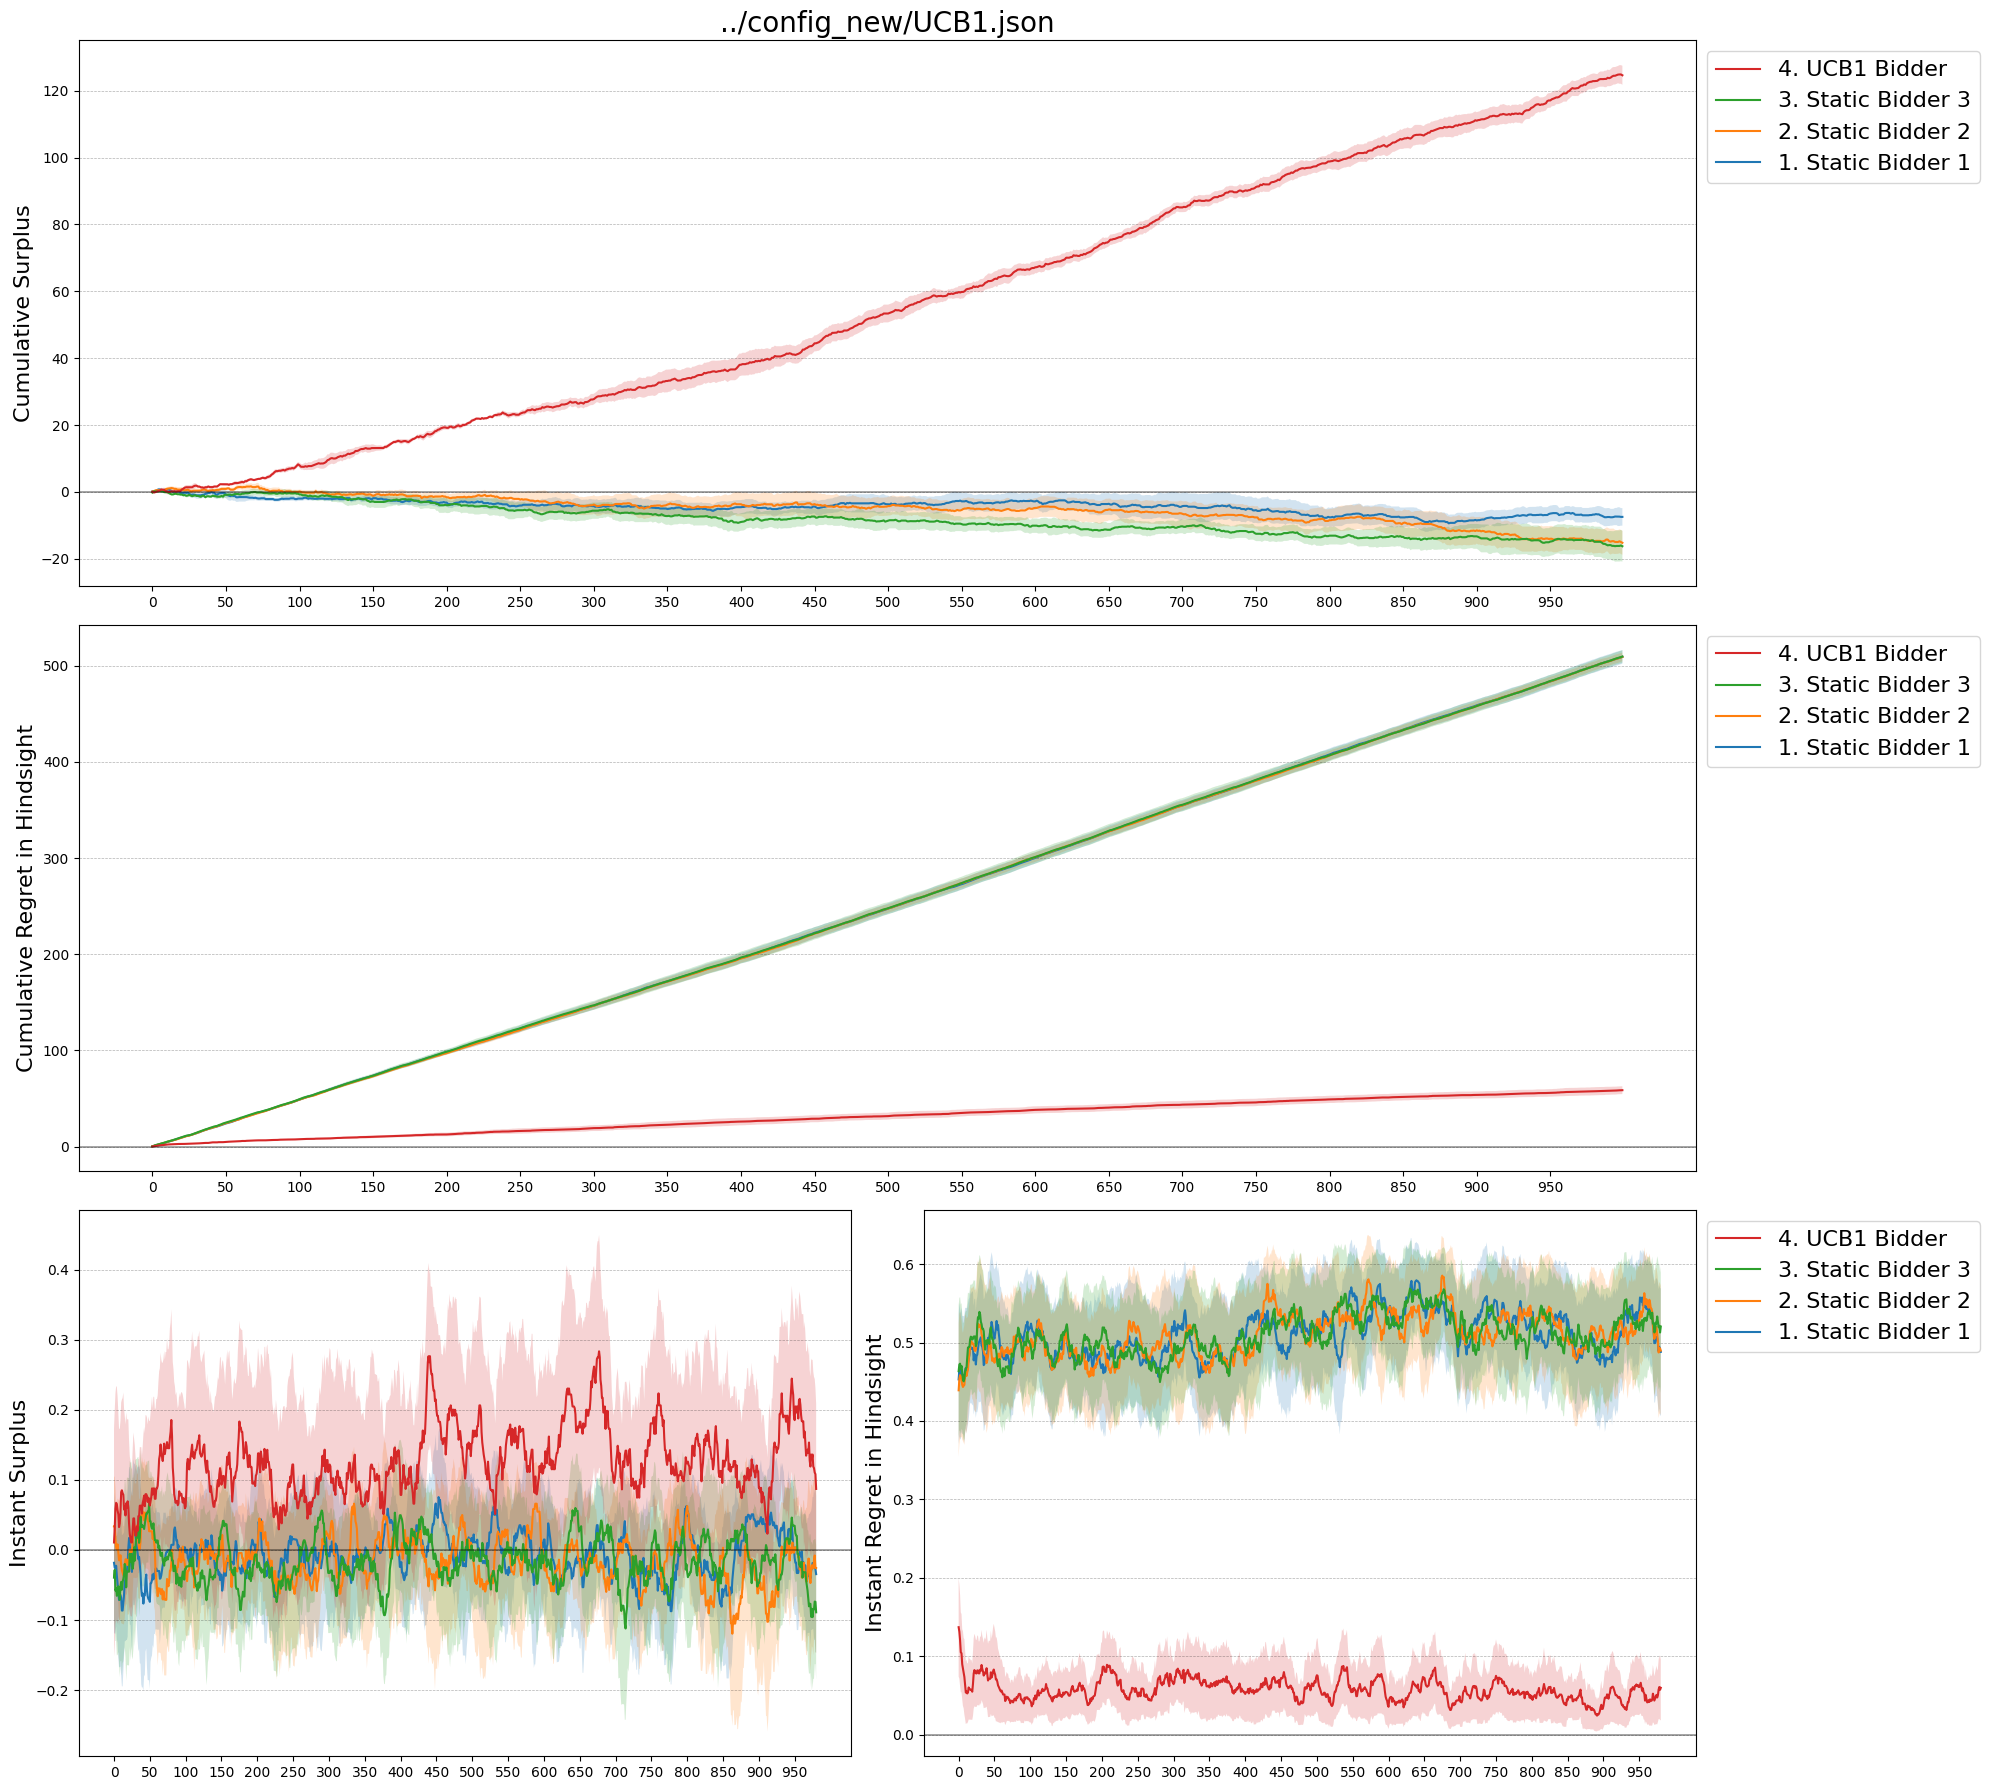

In [31]:
%matplotlib inline

show_graph(runs_results)

['4. UCB1 Bidder']
(1, 4, 1000)


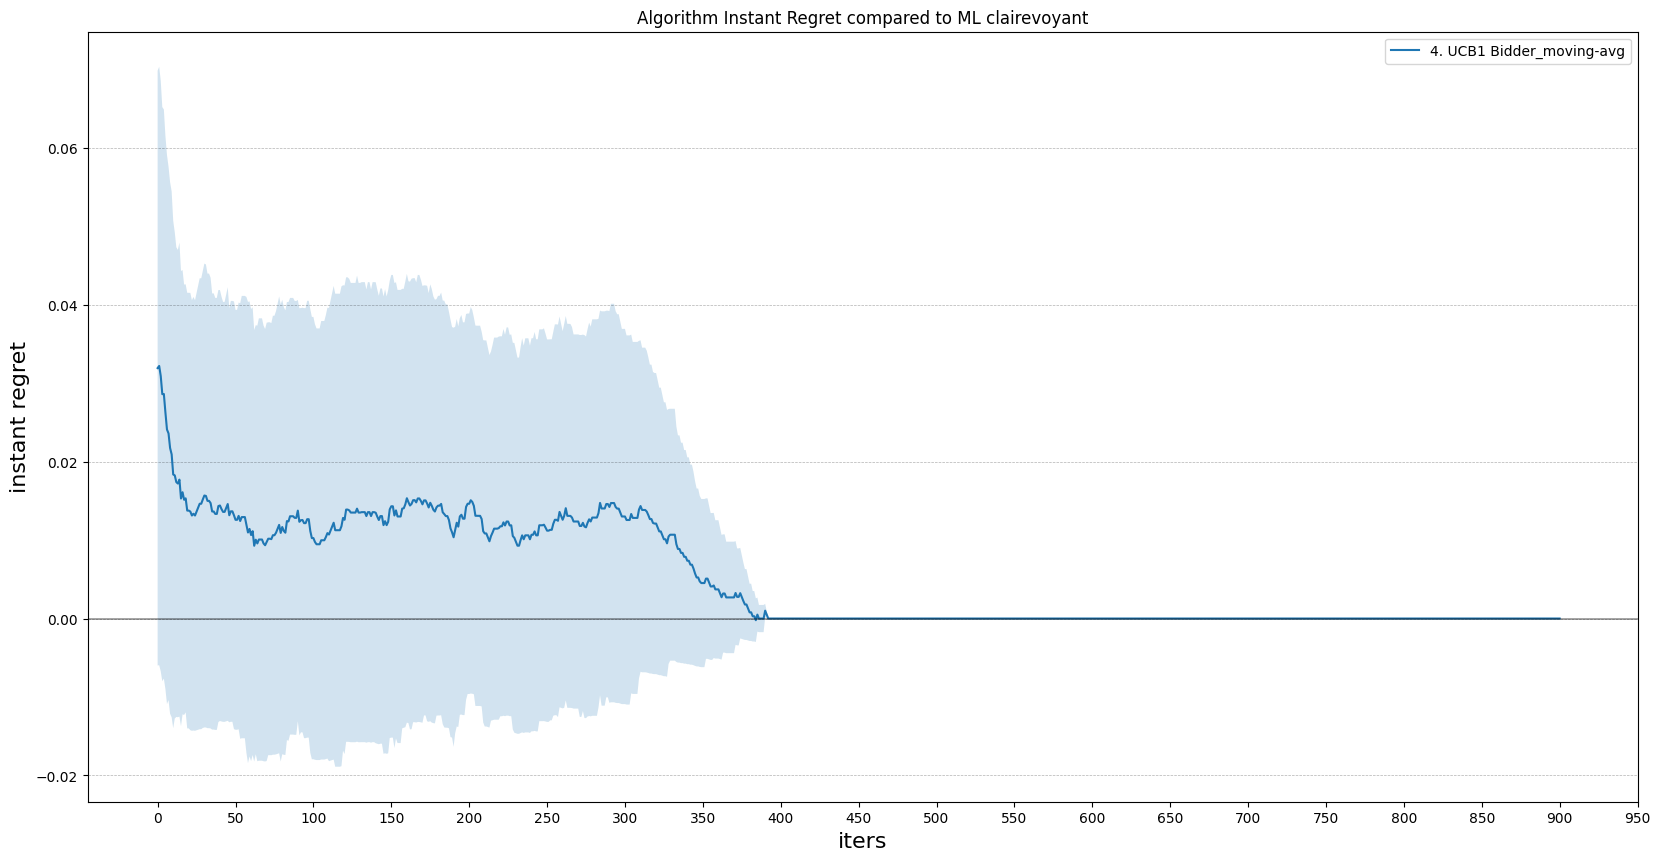

In [32]:
%matplotlib inline

import re
rule = re.compile(r'static', re.IGNORECASE)
my_agents_names_no_static = [a for a in my_agents_names if not rule.search(a)]
print(my_agents_names_no_static)

fig, ax = plt.subplots(1,1, sharey='row', figsize=(20,10))

ax.set_title("Algorithm Instant Regret compared to ML clairevoyant")

clairevoyant_regret = np.array([r[idx_cv_regret] for r in runs_results]).transpose(1,0,2)
print(clairevoyant_regret.shape)
data_amt = clairevoyant_regret.shape[2]
# construct_graph(clairevoyant_regret, ax, 'iters', 'instant regret', 
#                 x_width=num_iter*config['rounds_per_iter'], names=my_agents_names_no_static, 
#                 insert_labels=False, fontsize=fontsize, moving_average=1)
# construct_graph(clairevoyant_regret, ax, 'iters', 'instant regret', 
#                 x_width=num_iter*config['rounds_per_iter'], names=[n+'_moving-avg'for n in my_agents_names_no_static], 
#                 insert_labels=False, fontsize=fontsize, moving_average=data_amt//1000)
# construct_graph(clairevoyant_regret, ax, 'iters', 'instant regret', 
#                 x_width=num_iter*config['rounds_per_iter'], names=[n+'_moving-avg'for n in my_agents_names_no_static], 
#                 insert_labels=False, fontsize=fontsize, moving_average=data_amt//100)
construct_graph(clairevoyant_regret, ax, 'iters', 'instant regret', 
                x_width=num_iter*config['rounds_per_iter'], names=[n+'_moving-avg'for n in my_agents_names_no_static], 
                insert_labels=False, fontsize=fontsize, moving_average=data_amt//10)

plt.legend()
plt.show()

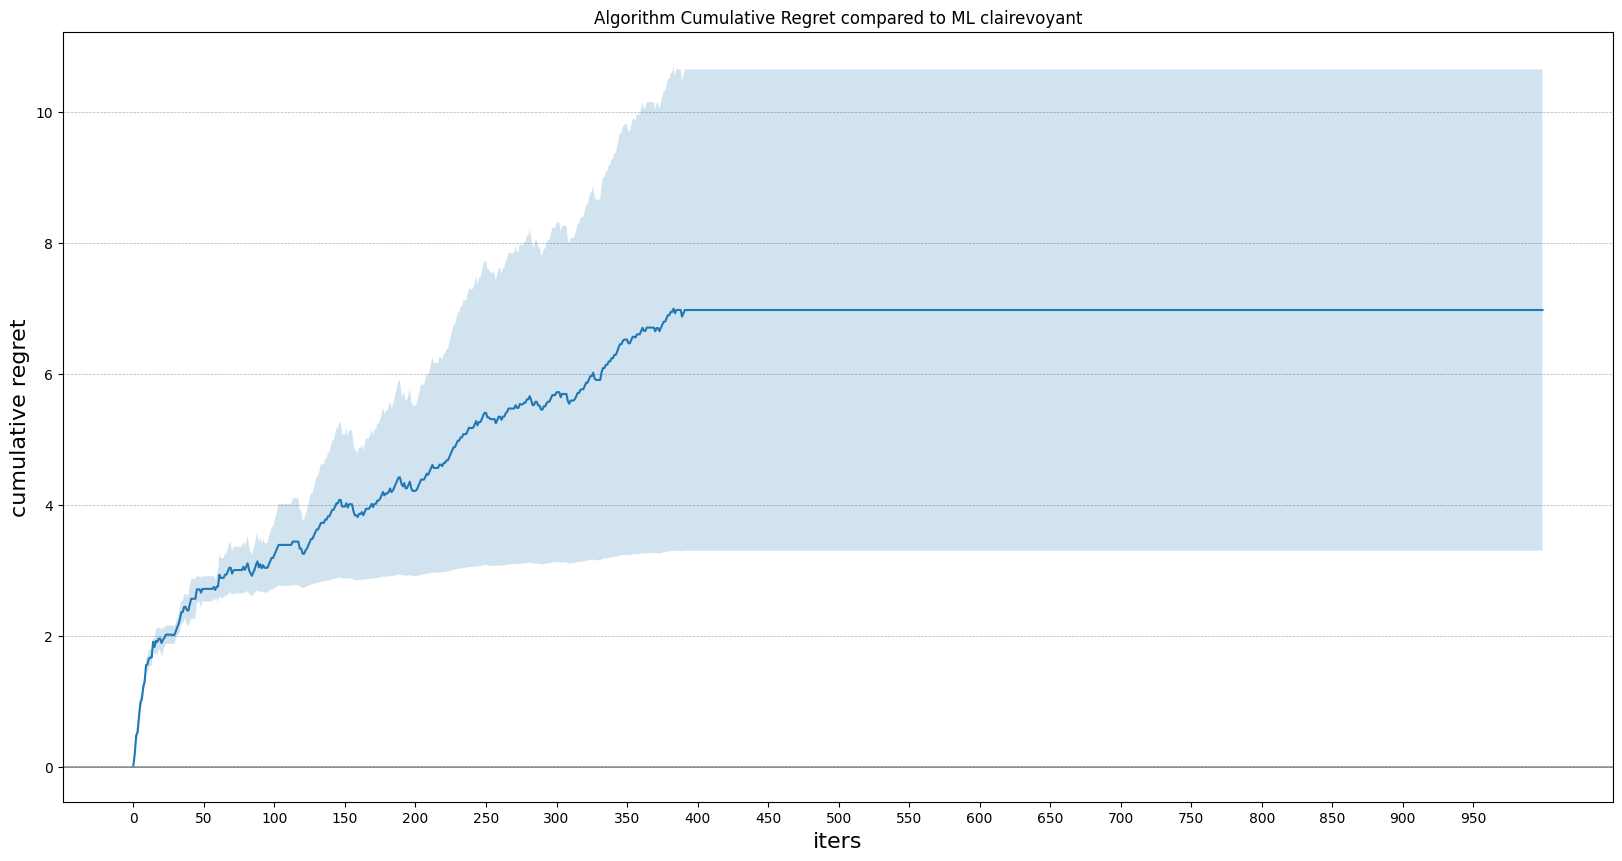

In [33]:
fig, ax = plt.subplots(1,1, sharey='row', figsize=(20,10))
ax.set_title("Algorithm Cumulative Regret compared to ML clairevoyant")

cumulative_clairevoyant_regret = clairevoyant_regret.cumsum(axis=2)

construct_graph(cumulative_clairevoyant_regret, ax, 'iters', 'cumulative regret', 
                x_width=num_iter*config['rounds_per_iter'], names=my_agents_names_no_static, 
                insert_labels=False, fontsize=fontsize, moving_average=1)

In [34]:
# %matplotlib qt

# show_graph(runs_results)

In [35]:
ar = ar.reshape((ar.shape[0], -1, ar.shape[-1]))
print(ar.shape)

(4, 5000, 2)


### discrete contexts, a graph each

In [36]:
DISCRETIZED_CONTEXT = True
SMALL_CONTEXTS_SETTING = True

In [37]:
if DISCRETIZED_CONTEXT:
    contexts = np.array([r[idx_contexts] for r in runs_results])
    if SMALL_CONTEXTS_SETTING:
        contexts = contexts[:,:,0]
    print(contexts.shape, contexts[0,:10])
    instant_regrets = np.array([x[idx_regrets] for x in runs_results]).squeeze().transpose(1,0,2)
    mask = np.where(np.isin(my_agents_names, my_agents_names_no_static))
    instant_regrets = instant_regrets[mask].squeeze()
    print(instant_regrets.shape)


    
    contexts_vals = list(set(contexts.flatten()))
    print(contexts_vals)

    contexts_vals_masks = [[None for _ in range(len(contexts_vals))] for _ in range(num_runs)]

    for r in range(num_runs):
        for i,c in enumerate(contexts_vals):
            contexts_vals_masks[r][i] = (contexts[r] == c)

    contexts_vals_masks = np.array(contexts_vals_masks).transpose(1,0,2)

    print(contexts_vals_masks.shape)
    print('contexts vals masks for agent 0:\t', contexts_vals_masks.sum(), contexts_vals_masks[0].sum(), contexts_vals_masks[0,0].sum())

(4, 1000) [ 1.09  0.00  0.00 -1.09 -1.09 -1.09 -1.09 -1.09  1.09  0.00]
(4, 1000)
[0.0, 1.09, -1.09]
(3, 4, 1000)
contexts vals masks for agent 0:	 4000 1282 318


In [38]:
instant_regrets[contexts_vals_masks[0]].shape,\
instant_regrets[contexts_vals_masks[1]].shape,\
instant_regrets[contexts_vals_masks[2]].shape


((1282,), (1364,), (1354,))

In [39]:
print(contexts_vals_masks[0][0].shape, contexts_vals_masks[0][0].sum())
print(instant_regrets[0].shape)
print(instant_regrets[0][contexts_vals_masks[0][0]].shape, '\n\n')

ir_contexts = [None for _ in range(len(contexts_vals))]

for c in range(len(contexts_vals)):
    ir_temp = [instant_regrets[r][contexts_vals_masks[c][r]] for r in range(num_runs)]
    min_length = min([len(x) for x in ir_temp])
    ir_temp = np.array([x[:min_length] for x in ir_temp])
    ir_contexts[c] = ir_temp
    print(ir_temp.shape)

#add empty dimension in position 0
# i = np.expand_dims(i, axis=0)
# i.shape

(1000,) 318
(1000,)
(318,) 


(4, 316)
(4, 332)
(4, 318)


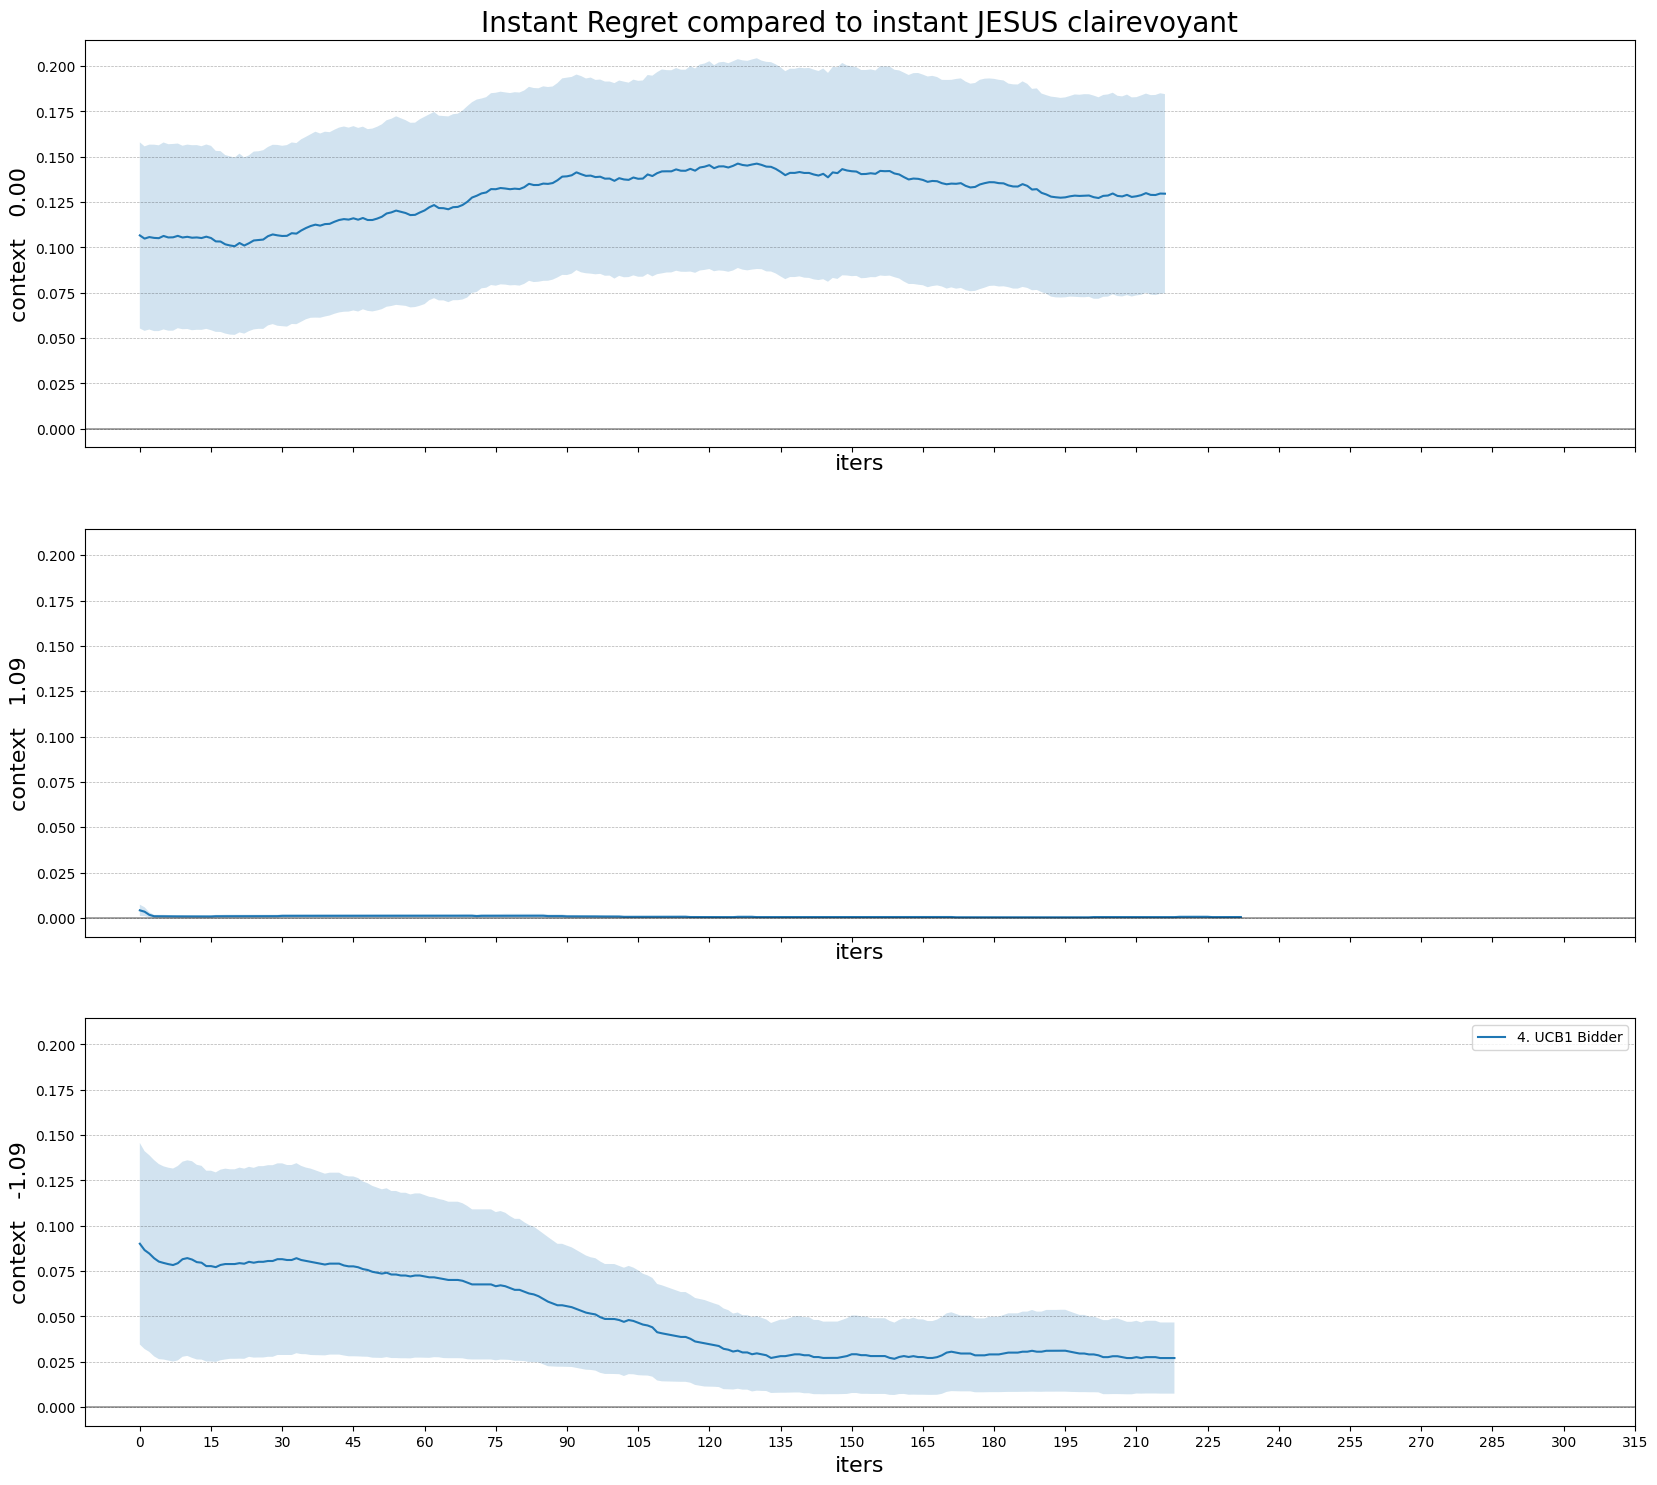

In [40]:
obs_context_dim = 2

fig, ax = plt.subplots(3,1, sharey='all', sharex='all', figsize=(20,18))

ax[0].set_title("Instant Regret compared to instant JESUS clairevoyant", fontsize=20)

moving_avg = lambda data, n=100 : np.convolve(data, np.ones(n), 'valid') / n

for i in range(len(contexts_vals)):
    ir_temp = ir_contexts[i]
    construct_graph(np.expand_dims(ir_temp, axis=0), ax[i], 'iters', f'context   {contexts_vals[i]:.2f}', 
                x_width=ir_temp.shape[-1], names=my_agents_names_no_static, 
                insert_labels=False, fontsize=16, moving_average=100)

# for r in range(num_runs):
#     ax.plot(moving_avg(i_r[r], 100), label=f'context {contexts_vals[0]}')


plt.legend()
plt.show()

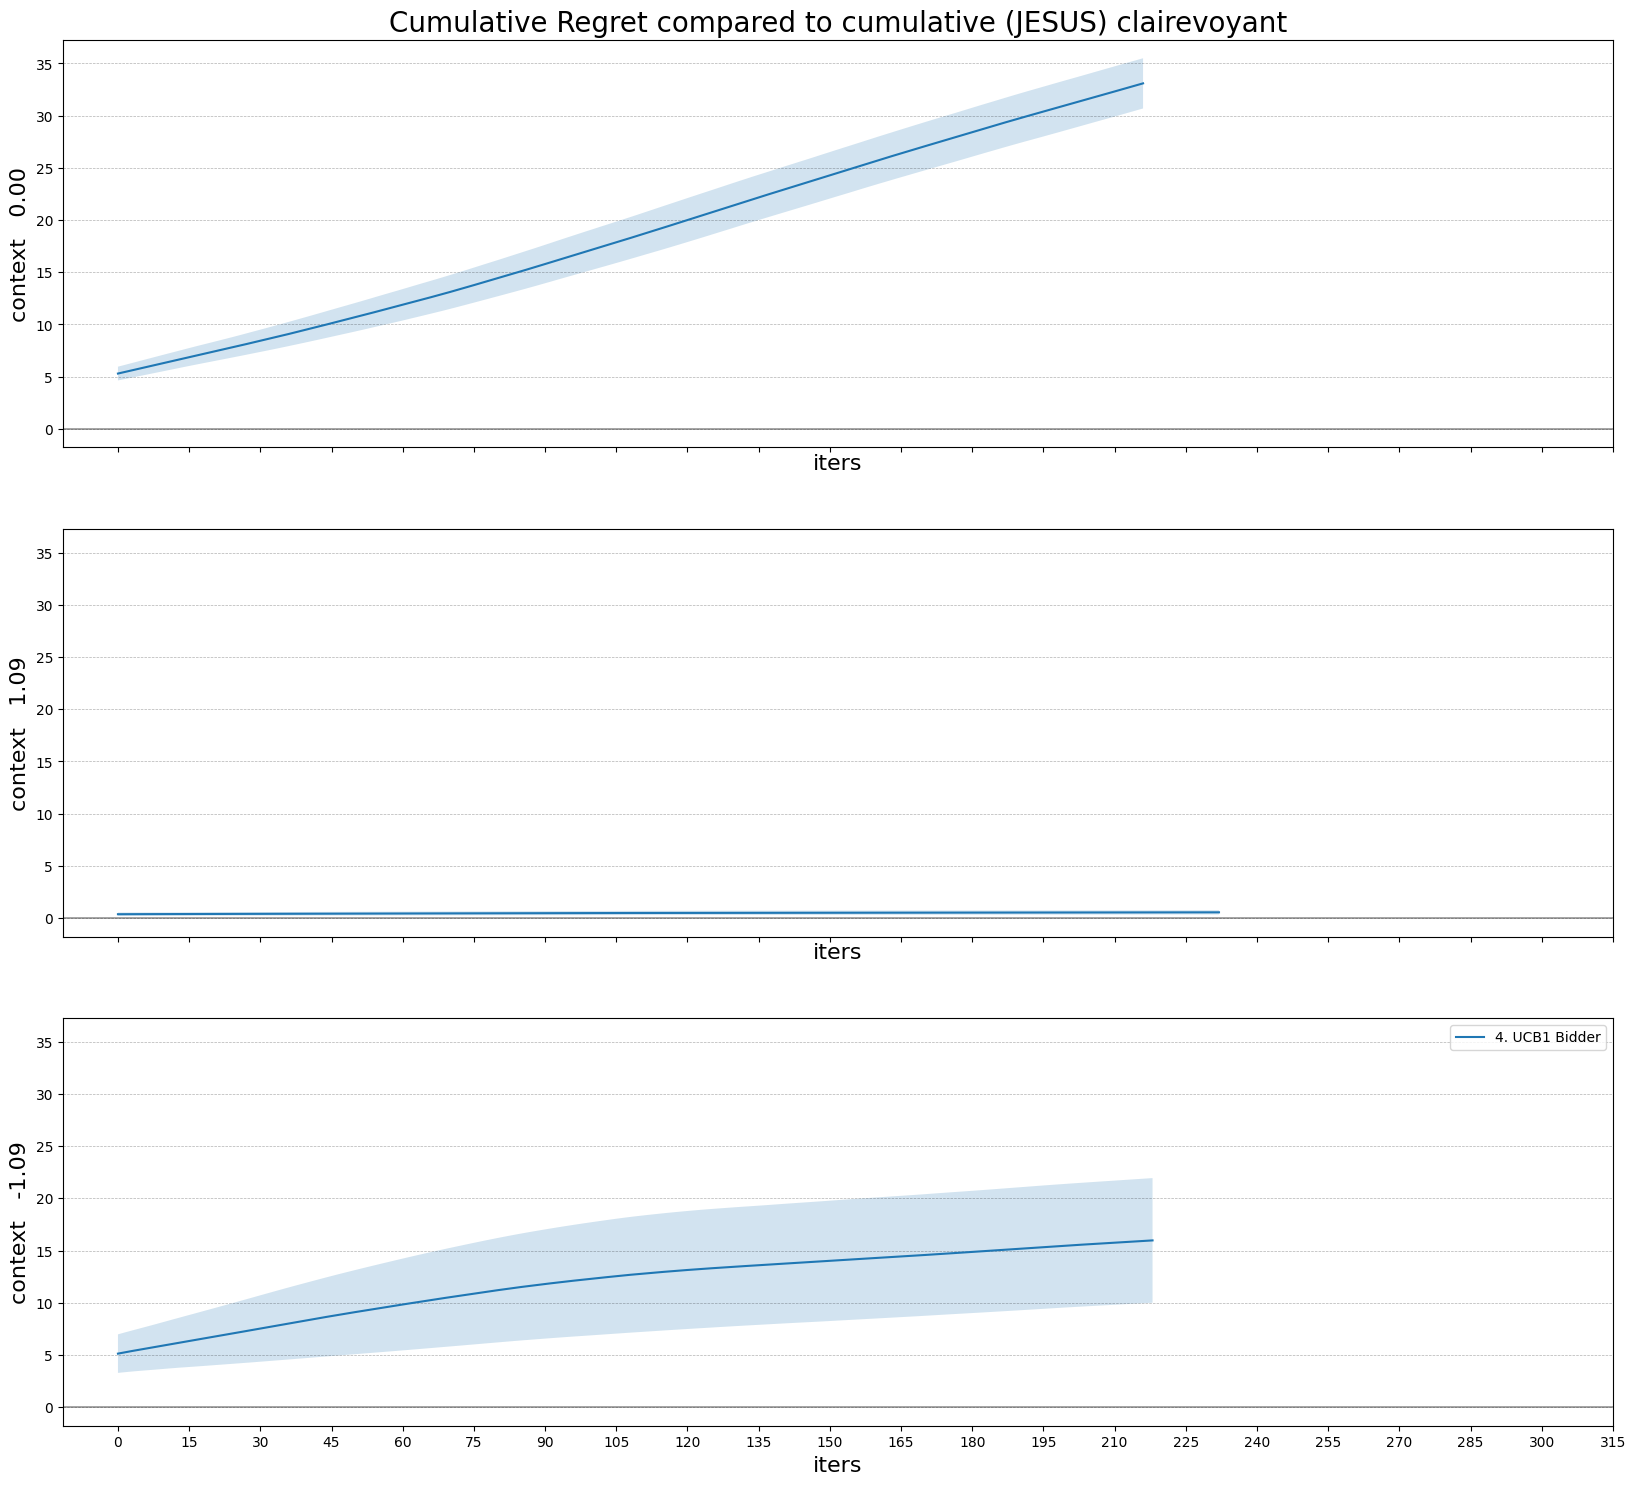

In [41]:
# CUMULATIVE

cr_contexts = [c.cumsum(axis=1) for c in ir_contexts]

fig, ax = plt.subplots(3,1, sharey='all', sharex='all', figsize=(20,18))

ax[0].set_title("Cumulative Regret compared to cumulative (JESUS) clairevoyant", fontsize=20)

for i in range(len(contexts_vals)):
    cr_temp = cr_contexts[i]
    construct_graph(np.expand_dims(cr_temp, axis=0), ax[i], 'iters', f'context   {contexts_vals[i]:.2f}', 
                x_width=cr_temp.shape[-1], names=my_agents_names_no_static, 
                insert_labels=False, fontsize=16, moving_average=100)
    
plt.legend()
plt.show()

### custom clairevoyant regret, split by context

In [42]:
contexts_vals_masks.shape, clairevoyant_regret.shape, len(contexts_vals)
cv_regret = clairevoyant_regret.squeeze()


In [43]:

if DISCRETIZED_CONTEXT:
    cv_ir_contexts = [None for _ in range(len(contexts_vals))]

    for c in range(len(contexts_vals)):
        cv_ir_temp = [cv_regret[r][contexts_vals_masks[c][r]] for r in range(num_runs)]
        cv_min_length = min([len(x) for x in cv_ir_temp])
        print(cv_min_length)
        cv_ir_temp = [x[:cv_min_length] for x in cv_ir_temp]
        cv_ir_temp = np.array(cv_ir_temp)
        cv_ir_contexts[c] = cv_ir_temp
        print(cv_ir_temp.shape)

316
(4, 316)
332
(4, 332)
318
(4, 318)


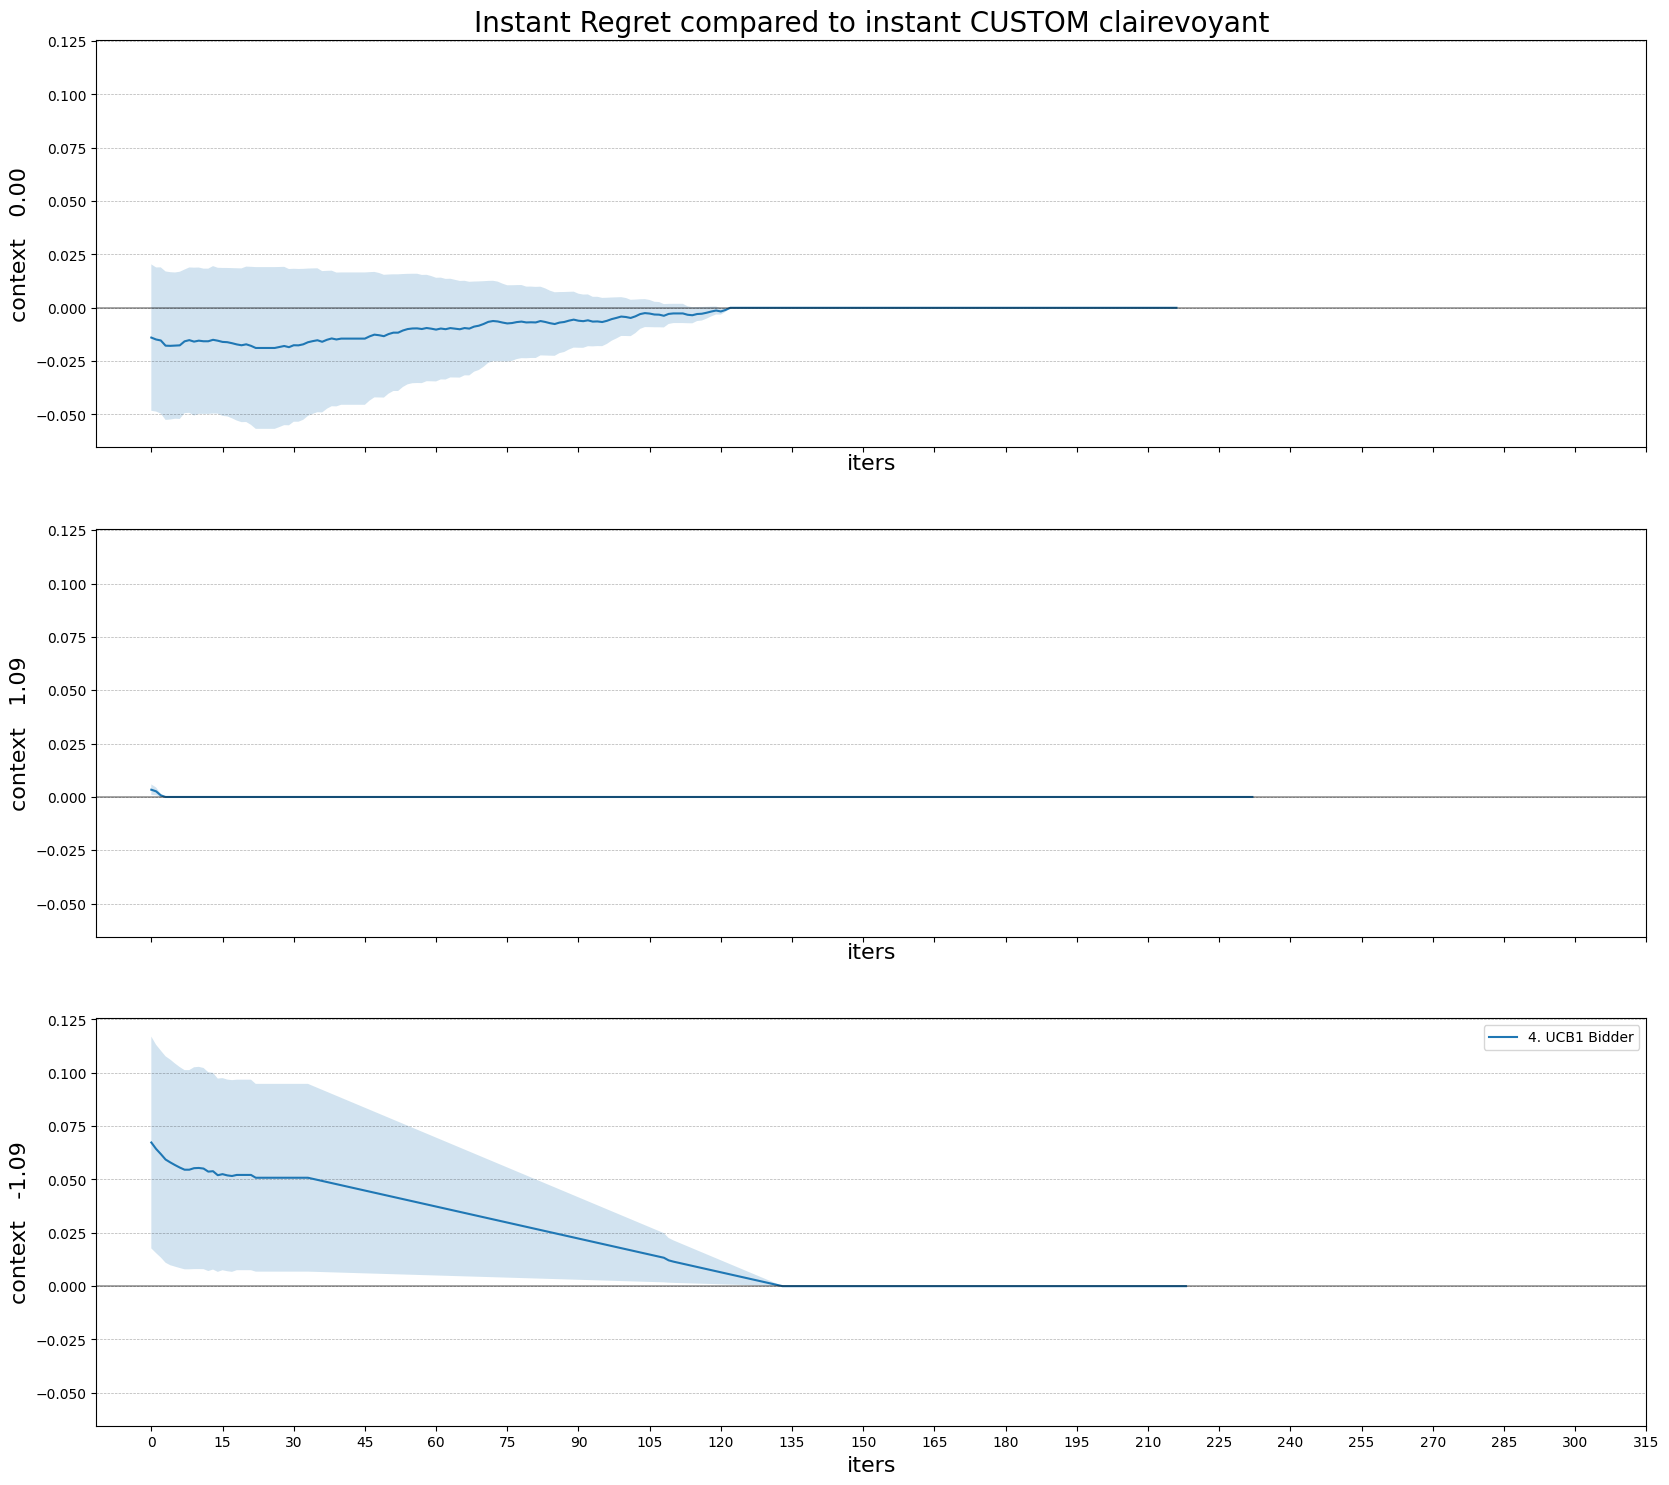

In [44]:
fig, ax = plt.subplots(3,1, sharey='all', sharex='all', figsize=(20,18))

ax[0].set_title("Instant Regret compared to instant CUSTOM clairevoyant", fontsize=20)

moving_avg = lambda data, n=100 : np.convolve(data, np.ones(n), 'valid') / n

for i in range(len(contexts_vals)):
    cv_ir_temp = cv_ir_contexts[i]
    construct_graph(np.expand_dims(cv_ir_temp, axis=0), ax[i], 'iters', f'context   {contexts_vals[i]:.2f}', 
                x_width=cv_ir_temp.shape[-1], names=my_agents_names_no_static, 
                insert_labels=False, fontsize=16, moving_average=100)

# for r in range(num_runs):
#     ax.plot(moving_avg(i_r[r], 100), label=f'context {contexts_vals[0]}')


plt.legend()
plt.show()

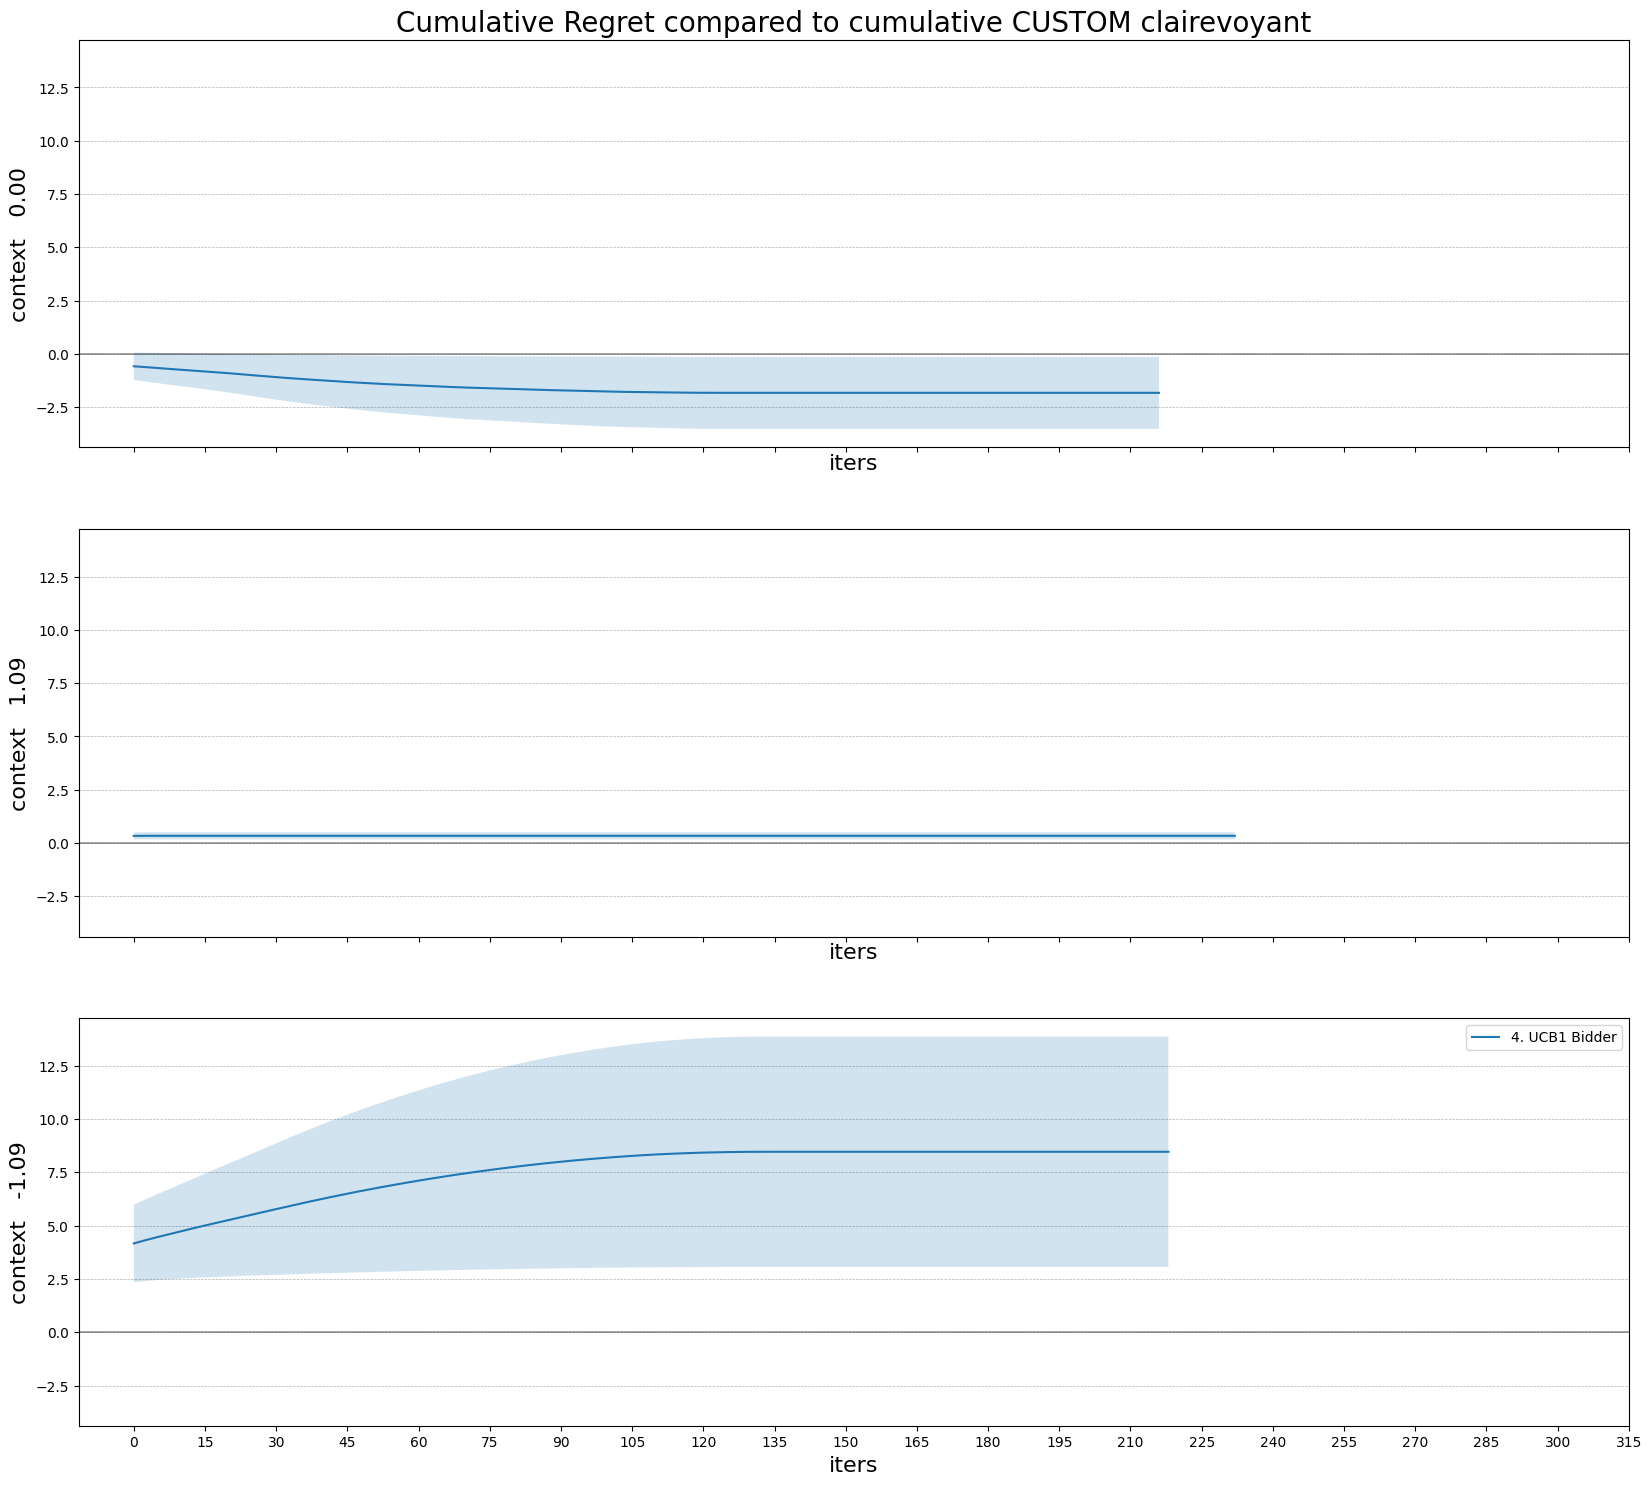

In [49]:
# CUMULATIVE

cv_cr_contexts = [c.cumsum(axis=1) for c in cv_ir_contexts]

fig, ax = plt.subplots(3,1, sharey='all', sharex='all', figsize=(20,18))

ax[0].set_title("Cumulative Regret compared to cumulative CUSTOM clairevoyant", fontsize=20)

for i in range(len(contexts_vals)):
    cv_cr_temp = cv_cr_contexts[i]
    construct_graph(np.expand_dims(cv_cr_temp, axis=0), ax[i], 'iters', f'context   {contexts_vals[i]:.2f}', 
                x_width=cv_cr_temp.shape[-1], names=my_agents_names_no_static, 
                insert_labels=False, fontsize=16, moving_average=100)
    
plt.legend()
plt.show()

#### Run no. 7 was bad, removed to see how much it counted

In [46]:
# r = runs_results.copy()
# r = np.array(r)
# r = np.delete(r, 7, axis=0)
# show_graph(r)

In [47]:
# c = clairevoyant_regret.copy()
# print(c.shape)
# c = np.delete(c, 7, axis=1)
# print(c.shape)

In [48]:
# ### LA RUN NUMERO 7 É FOTTUTISSIMA

# fig, ax = plt.subplots(1,1, sharey='row', figsize=(20,10))

# ax.set_title("Algorithm Regret compared to ML clairevoyant")

# data_amt = clairevoyant_regret.shape[2]
# construct_graph(c, ax, 'iters', 'cumulative regret', 
#                 x_width=num_iter*config['rounds_per_iter'], names=['ALL BUT 7'], 
#                 insert_labels=False, fontsize=fontsize, moving_average=1000)
# construct_graph(clairevoyant_regret, ax, 'iters', 'cumulative regret', 
#                 x_width=num_iter*config['rounds_per_iter'], names=["ALL WITH 7"], 
#                 insert_labels=False, fontsize=fontsize, moving_average=1000)

# plt.legend()
# plt.show()